In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
boston_dataset = datasets.load_boston()

C:\Users\S KISHORE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [15]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [16]:
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

X=boston_pd.iloc[:, :-1]

Y= boston_pd.iloc[:,-1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [17]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1],
                                                   boston_pd.iloc[:,-1],
                                                   test_size=0.25)

(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

# Linear Regression

In [20]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

lreg_y_pred = lreg.predict(x_test)

#MSE

mean_squared_error = np.mean((lreg_y_pred-y_test)**2)
print("Mean Squared Error on test set : ", mean_squared_error)


#putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns'] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)



Mean Squared Error on test set :  25.117724177214303
    Columns  Coefficient Estimate
0      CRIM             -0.092611
1        ZN              0.048245
2     INDUS             -0.023371
3      CHAS              2.265922
4       NOX            -17.785646
5        RM              3.537316
6       AGE              0.001630
7       DIS             -1.488506
8       RAD              0.297717
9       TAX             -0.010487
10  PTRATIO             -1.001236
11        B              0.010777
12    LSTAT             -0.520127


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

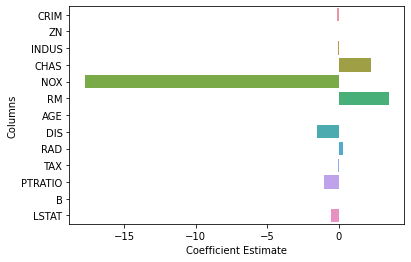

In [21]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate', y= 'Columns',data = lreg_coefficient )

# Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

ridge_R = Ridge(alpha = 0.99)
ridge_R.fit(x_train, y_train)
y_pred = ridge_R.predict(x_test)


#MSE
mean_squared_error_R = np.mean((y_pred-y_test)**2)
print("Mean Squared Error on test set : ", mean_squared_error_R)


#putting together the coefficient and their corresponding variable names
Ridge_coefficient = pd.DataFrame()
Ridge_coefficient['Columns'] = x_train.columns
Ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge_R.coef_)
print(Ridge_coefficient)



Mean Squared Error on test set :  25.338551466178064
    Columns  Coefficient Estimate
0      CRIM             -0.087357
1        ZN              0.049565
2     INDUS             -0.057185
3      CHAS              2.099199
4       NOX             -9.741769
5        RM              3.575539
6       AGE             -0.005064
7       DIS             -1.363035
8       RAD              0.280827
9       TAX             -0.011363
10  PTRATIO             -0.912304
11        B              0.011018
12    LSTAT             -0.529907


# Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

Lasso_L = Lasso(alpha = 0.05)
Lasso_L.fit(x_train, y_train)
y_pred1 = Lasso_L.predict(x_test)


#MSE
mean_squared_error_L = np.mean((y_pred1-y_test)**2)
print("Mean Squared Error on test set : ", mean_squared_error_L)


#putting together the coefficient and their corresponding variable names
Lasso_coefficient = pd.DataFrame()
Lasso_coefficient['Columns'] = x_train.columns
Lasso_coefficient['Coefficient Estimate'] = pd.Series(Lasso_L.coef_)
print(Lasso_coefficient)



Mean Squared Error on test set :  26.143068632846973
    Columns  Coefficient Estimate
0      CRIM             -0.081181
1        ZN              0.050718
2     INDUS             -0.083149
3      CHAS              1.354098
4       NOX             -1.619394
5        RM              3.531776
6       AGE             -0.009609
7       DIS             -1.210169
8       RAD              0.265683
9       TAX             -0.012478
10  PTRATIO             -0.828712
11        B              0.011274
12    LSTAT             -0.549226


# ElasticNet

In [24]:
from sklearn.linear_model import ElasticNet

E_Net = ElasticNet(alpha = 0.02,l1_ratio = .2)
E_Net.fit(x_train, y_train)
y_pred_enet = E_Net.predict(x_test)


#MSE
mean_squared_error_Enet = np.mean((y_pred_enet-y_test)**2)
print("Mean Squared Error on test set : ", mean_squared_error_Enet)


#putting together the coefficient and their corresponding variable names
Enet_coefficient = pd.DataFrame()
Enet_coefficient['Columns'] = x_train.columns
Enet_coefficient['Coefficient Estimate'] = pd.Series(E_Net.coef_)
print(Enet_coefficient)


Mean Squared Error on test set :  26.008090543453562
    Columns  Coefficient Estimate
0      CRIM             -0.083942
1        ZN              0.051323
2     INDUS             -0.085661
3      CHAS              1.651761
4       NOX             -2.715170
5        RM              3.453609
6       AGE             -0.009135
7       DIS             -1.250495
8       RAD              0.272266
9       TAX             -0.012384
10  PTRATIO             -0.846395
11        B              0.011163
12    LSTAT             -0.550519
